In [31]:
from sklearn import datasets
import pandas as pd
import numpy as np
import scipy.stats as st 
import matplotlib.pyplot as plt

# 1. 載入iris資料集作為示範

In [32]:
iris = datasets.load_iris()  # 以字典型態載入

In [33]:
# 用表格呈現前五筆(除了features以外，新增一欄位紀錄鳶尾花品種)

table = pd.DataFrame(iris["data"],columns = iris["feature_names"])
table["target"] = [iris["target_names"][d] for d in iris["target"]]
table.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* 其他所有提供的分配
https://docs.scipy.org/doc/scipy/reference/stats.html<br>
例如：st.t.rvs(df, loc=0, scale=1, size=1, random_state=None)

# 2. 查表：以Z分配示範

已知Z分配的pdf為：
$f(x)=\frac{exp(\frac{-x^2}{2})}{\sqrt{2\pi}}$
## 2.1 求$P(x_0)$ : st.norm.pdf

In [4]:
# 在 Normal(mean = 0, s.d. = 1)之中，x=0的機率為:

print("scipy的運算結果為：",st.norm.pdf(0,loc = 0,scale = 1))
print("照數學式驗算結果為：",1/((2*np.pi)**(1/2)))

scipy的運算結果為： 0.3989422804014327
照數學式驗算結果為： 0.3989422804014327


In [5]:
# 在 Normal(mean = 0, s.d. = 1)之中，x=1的機率為:

print("scipy的運算結果為：",st.norm.pdf(1,loc = 0,scale = 1))
print("照數學式驗算結果為：",np.exp(-1/2)/((2*np.pi)**(1/2)))

scipy的運算結果為： 0.24197072451914337
照數學式驗算結果為： 0.24197072451914337


## 2.2 求$P(X< x_0)$ : st.norm.cdf

In [73]:
st.norm.cdf(0,loc=0,scale=1) 

0.5

In [74]:
# 驗證empirical rule

print("左右3個標準差內：",st.norm.cdf(3,loc=0,scale=1) - st.norm.cdf(-3,loc=0,scale=1))
print("左右2個標準差內：",st.norm.cdf(2,loc=0,scale=1) - st.norm.cdf(-2,loc=0,scale=1))
print("左右1個標準差內：",st.norm.cdf(1,loc=0,scale=1) - st.norm.cdf(-1,loc=0,scale=1))

左右3個標準差內： 0.9973002039367398
左右2個標準差內： 0.9544997361036416
左右1個標準差內： 0.6826894921370859


## 2.3 已知$P(X< x_0)$，求$x_0$：st.norm.ppf
ppf是cdf的反函數

$\Phi(0.5)$

In [11]:
st.norm.ppf(0.5, loc=0, scale=1)

0.0

$\Phi(0.975)$

In [12]:
st.norm.ppf(0.975, loc=0, scale=1)

1.959963984540054

# 3. 檢定

## 3.1 單母體T檢定
`scipy.stats.ttest_1samp(observations, expected mean, alternative='two-sided')`<br>
[source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)

> **練習:**<br>
iris資料集中，sepal length(cm)的平均數是否大於5？<br>
$H_{0}: The\ mean\ of\ sepal\ length\ (cm)\ is\ less\ than\ 5.$ <br>
$H_{1}: The\ mean\ of\ sepal\ length\ (cm)\ is\ greater\ than\ or\ equal\ to\ 5.$

In [8]:
result = st.ttest_1samp(table["sepal length (cm)"],5.0,alternative='greater')
print(f"T統計值為{result.statistic}，p value為{result.pvalue}")

T統計值為12.473257146694761，p value為3.3353711499009633e-25


### check the result

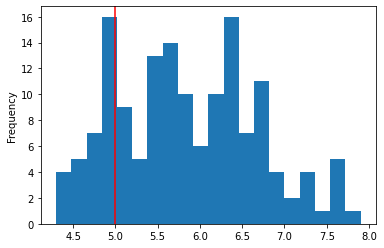

In [14]:
table["sepal length (cm)"].plot.hist(bins = 20)
plt.axvline(5,color = "red")

## 3.2 兩獨立母體平均數T檢定
`scipy.stats.ttest_ind(樣本a, 樣本b, equal_var=True, alternative='two-sided')`<br>
[source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

> **練習:**<br>
iris資料集中，sepal length(cm)的平均數是否不同於petal length(cm)？<br>
$H_{0}: The\ mean\ of\ sepal\ length\ (cm)\ equals\ the\ mean\ of\ petal\ length\ (cm)$ <br>
$H_{1}: The\ mean\ of\ sepal\ length\ (cm)\ does\ not\ equal\ the\ mean\ of\ petal\ length\ (cm)$

### 3.2.1 令變異數相同: equal_var=True (default)

In [15]:
result = st.ttest_ind(table["sepal length (cm)"], table["petal length (cm)"])
print(f"T統計值為{result.statistic}，p value為{result.pvalue}")

T統計值為13.09835310896086，p value為2.8571040695819004e-31


### 3.2.2 令變異數不同: equal_var=False

In [16]:
result = st.ttest_ind(table["sepal length (cm)"], table["petal length (cm)"],equal_var=False)
print(f"T統計值為{result.statistic}，p value為{result.pvalue}")

T統計值為13.09835310896086，p value為4.262173272631899e-29


### check the result

<AxesSubplot:ylabel='Frequency'>

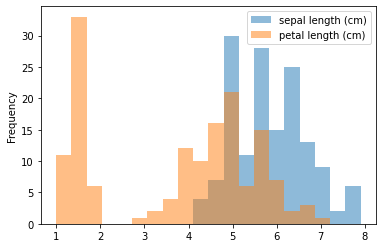

In [19]:
table[["sepal length (cm)","petal length (cm)"]].plot.hist(bins = 20,alpha = 0.5)

In [21]:
table[["sepal length (cm)","petal length (cm)"]].mean()

sepal length (cm)    5.843333
petal length (cm)    3.758000
dtype: float64

## 3.3 兩不獨立母體平均數T檢定
`scipy.stats.ttest_rel(樣本a, 樣本b, alternative='two-sided')`<br>
[source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)<br>
> **練習:**<br>
若假定sepal length(cm)與petal length(cm)來自兩不獨立母體，則欲求兩者是否平均數相異？

In [50]:
result = st.ttest_rel(table["sepal length (cm)"], table["petal length (cm)"])
print(f"T統計值為{result.statistic}，p value為{result.pvalue}")

T統計值為22.81321951765914，p value為1.7996292277334387e-50


## 3.4 one-way ANOVA

`scipy.stats.f_oneway(樣本a, 樣本b, 樣本c, ...)`<br>
[source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

> **練習:**<br>
iris資料集中，各個鳶尾花品種的sepal length(cm)平均數是否相異？<br>
$H_{0}: The\ means\ of\ sepal\ length\ (cm)\ of\ setosa,\ versicolor,\ and\  virginica\ are\ equivalent.$ <br>
$H_{1}: The\ means\ of\ sepal\ length\ (cm)\ of\ setosa,\ versicolor,\ and\  virginica\ are\ not\ equivalent.$ 

In [49]:
result = st.f_oneway(table[table["target"]=="setosa"]["sepal length (cm)"],     # setosa的 sepal length (cm)
                     table[table["target"]=="versicolor"]["sepal length (cm)"], # versicolor的 sepal length (cm)
                     table[table["target"]=="virginica"]["sepal length (cm)"])  # virginica的 sepal length (cm)
print(f"F統計值為{result.statistic}，p value為{result.pvalue}")

F統計值為119.26450218450468，p value為1.6696691907693826e-31


### check the result

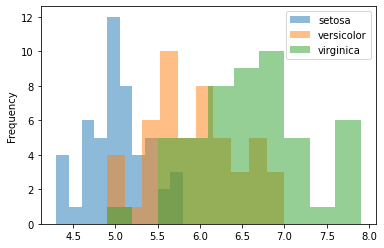

In [42]:
table.groupby('target')['sepal length (cm)'].plot.hist(legend=True,alpha = 0.5)
plt.show()

## 3.5 卡方檢定
The chi-square test tests the null hypothesis that the categorical data has the given frequencies.<br>
`scipy.stats.chisquare(categorical樣本分佈情形, categorical樣本理想分佈情形)`<br>
[source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)

> **練習:**<br>
iris資料集中，𝑠𝑒𝑡𝑜𝑠𝑎, 𝑣𝑒𝑟𝑠𝑖𝑐𝑜𝑙𝑜𝑟, 𝑎𝑛𝑑 𝑣𝑖𝑟𝑔𝑖𝑛𝑖𝑐𝑎的筆數是否符合 50, 50, 50？<br>
$H_{0}: The\ number\ of\ observations\ of\ setosa,\ versicolor,\ and\  virginica\ are\ equivalent.$ <br>
$H_{1}: The\ number\ of\ observations\ of\ setosa,\ versicolor,\ and\  virginica\ are\ not\ equivalent.$ <br>

In [75]:
table["target"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

In [48]:
result = st.chisquare(table["target"].value_counts(),[50,50,50])
print(f"卡方值為{result.statistic}，p value為{result.pvalue}")

卡方值為0.0，p value為1.0


### check the result

<AxesSubplot:>

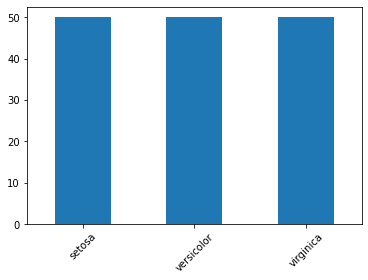

In [34]:
table["target"].value_counts().plot.bar(rot = 45)

## 3.6 Test of Proportion
Perform a test that the probability of success is p.<br>
`scipy.stats.binomtest(k =「成功」筆數, n = 總筆數, p = 預期比例, alternative='two-sided')`<br>
[source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binomtest.html#scipy.stats.binomtest)
> **練習:**<br>
TEJ資料庫中，2020年底統計該年度上市櫃公司共1715間，其中有53間有更換會計師事務所。現今希望了解上市櫃公司中更換會計師事務所的比例，欲用比例檢定了解其比例（p）是否為0.04。<br>
$H_{0}: p = 0.04$ <br>
$H_{1}: p \neq 0.04$ <br>

In [35]:
result = st.binomtest(53,1715, p=0.04, alternative='two-sided')

print(f"The point estimate is {result.proportion_estimate}.\nThe p value of the test is {result.pvalue}.")

The point estimate is 0.030903790087463558.
The p value of the test is 0.05584303301029005.


## 3.7 Test of two proportions
`statsmodels.stats.proportion.test_proportions_2indep(count1, nobs1, count2, nobs2, value=None, method=None, compare='diff', alternative='two-sided', correction=True, return_results=True)`<br>
[source](https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.test_proportions_2indep.html)
> **練習:**<br>
TEJ資料庫中，2020年底統計該年度上市櫃公司共1715間，其中有53間有更換會計師事務所；而2019年上市櫃公司共1685間，其中有44間有更換會計師事務所。現今希望了解兩個年度的上市櫃公司更換會計師事務所的比例是否相異。令2019年比例為$p_{1}$，2020年比例為$p_{2}
$。<br>
$H_{0}: p_{1} = p_{2}$ <br>
$H_{1}: p_{1} \neq p_{2}$ <br>

In [37]:
from statsmodels.stats.proportion import test_proportions_2indep

# 此數由於 H0: p1 = p2，即表示 p1 - p2 = 0，因此value填0即可。欲比較兩母體之差，因此compare = 'diff'。
result = test_proportions_2indep(53, 1715, 44, 1685, value=0, compare='diff', alternative='two-sided', correction=True, return_results=True)

In [41]:
print(f"The z statistic is {result.statistic}.\nThe p value of the test is {result.pvalue}.")

The z statistic is 0.8296866552748235.
The p value of the test is 0.4067159683425684.


## 3.8 Test of ratio of two variances (unknown $\mu $)
[參考來源](https://www.geeksforgeeks.org/how-to-perform-an-f-test-in-python/)<br>
欲實現虛無假設為$H_{0}: \frac{\sigma_{1}}{\sigma_{2}} = k$ <br> 
註：f_test的f-statistic計算式為$\frac{s_{1}^2 / s_{2}^2}{k}$。<br>
而$s_{1}^2$的計算為$\frac{\sum_{i=1}^{m} (x_{i}-\bar x)^2}{m-1}$(令樣本1共m筆)，以此類推。

In [65]:
# test data
group1 = [26,25,43,34,18,52]
group2 = [23,30,18,25,28]
  
# function    
def f_test(group1, group2,k=1):
    f = (np.var(group1, ddof=1)/np.var(group2, ddof=1))/k
    nun = len(group1)-1
    dun = len(group2)-1
    p_value = 1-st.f.cdf(f, nun, dun)
    return f, p_value

# run
f_test(group1, group2)

(7.373271889400921, 0.037888376133341395)

### 補充：改寫成與其他檢定相似的class

In [66]:
import scipy.stats as st
class ftest():
    '''f test: compares the ratio of the variances of two populations and determines if they are statistically similar or not '''
    def __init__(self,data1,data2,k=1):
        self.data1 = data1
        self.data2 = data2
        self.k = k
        self.statistic, self.pvalue = self.f_test()

    def f_test(self):
        f = (np.var(self.data1, ddof=1)/np.var(self.data2, ddof=1))/self.k
        nun, dun = len(self.data1)-1, len(self.data2)-1
        p_value = 1-st.f.cdf(f, nun, dun)
        return f, p_value    

In [72]:
group1 = [26,25,43,34,18,52]
group2 = [23,30,18,25,28]
result = ftest(group1,group2)
print(f"The f statistic is {result.statistic}.\nThe p value of the test is {result.pvalue}.")

The f statistic is 7.373271889400921.
The p value of the test is 0.037888376133341395.
